<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Finanzas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install investpy

In [ ]:
import investpy as inv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
from google.colab import files

In [ ]:
inv.get_stocks_list("colombia")

In [ ]:
Bancolombia_ordinaria=inv.get_stock_historical_data("BIC_p1",country="colombia",from_date='01/01/2017',to_date='08/01/2022')
ordinaria=Bancolombia_ordinaria[["Close"]]
print(ordinaria)

In [49]:
ordinaria.mean() # Promedio

Close    32895.535568
dtype: float64

In [ ]:
ordinaria.median() # Mediana

In [ ]:
ordinaria.std() # Desviacion Estandar

In [ ]:
ordinaria.var() # Varianza

In [ ]:
Bancolombia_preferencial=inv.get_stock_historical_data("BIC",country="colombia",from_date='01/01/2017',to_date='08/01/2022')
preferencial=Bancolombia_preferencial[["Close"]]
print(preferencial)

In [ ]:
ordinaria.plot.line()

In [ ]:
preferencial.plot.line()

In [ ]:
Bancolombia=pd.concat([ordinaria,preferencial],axis=1)
print(Bancolombia)

In [ ]:
Bancolombia_frame = pd.DataFrame(Bancolombia) #convertir dataframe 
Bancolombia_frame.columns = ['preferencial', 'ordinaria']
print(Bancolombia_frame)

In [ ]:
Bancolombia.describe()# Estadisticas descriptivas 

In [83]:
est = smf.ols(formula='ordinaria ~ preferencial', data = Bancolombia_frame).fit() # regresion lineal 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ordinaria   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 3.557e+04
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        01:35:22   Log-Likelihood:                -10119.
No. Observations:                1222   AIC:                         2.024e+04
Df Residuals:                    1220   BIC:                         2.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2235.8799    160.296     13.948      0.000    1921.393    2550.367
preferencial     0.9055      0.005    188.597      0.000       0.896       0.915
==============================================================================
Omnibus:                       38.291   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.196
Skew:                          -0.287   Prob(JB):                     2.31e-13
Kurtosis:                       3.901   Cond. No.                     1.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

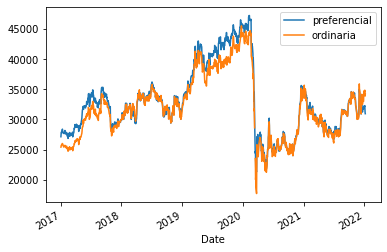

In [81]:
Bancolombia.plot.line()

In [ ]:
retrono_ordinaria=np.log(ordinaria)-np.log(ordinaria.shift(1))# calculo retornos
print(retrono_ordinaria)

In [ ]:
plt.plot(retrono_ordinaria)

In [ ]:
retrono_preferencial=np.log(preferencial)-np.log(preferencial.shift(1))
print(retrono_preferencial)

In [ ]:
plt.plot(retrono_preferencial)